In [1]:
from evaluation import EvaluationMetrics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
eval = EvaluationMetrics()

Loading Word2Vec model from local storage...
Loading spaCy model from local storage...


In [4]:
projects = ["threshold"]
project_names = {"top-k": "Top-k Retrieval", "threshold": "Similarity Threshold Retrieval"}
datasets = ["NQ", "TriviaQA"] #, "SQuAD", "ASQA"]
vary_terms = {"top-k": "k", "threshold": "th"}
vary_values = {("top-k", "k"): [0, 1, 2, 3, 5, 10, 15, 20, 30, 40], ("threshold", "th"): [0, 0.3, 0.5, 0.6, 0.7, 0.75, 0.8, 0.83, 0.85, 0.88, 0.9, 0.92, 0.95, 0.98, 1]}
metrics = ["Rouge1", "Rouge2", "RougeL", "Inner Diversity", "Inter Diversity"]


In [5]:
scores = {}

for project in projects:
    term = vary_terms[project]
    values = vary_values[(project, term)]
    scores[project] = {}
    for metric in metrics:
        scores[project][metric] = []

    for ds in datasets:
        folder_path = f"clean_data/{project}/{ds}"
        canlist_path = folder_path+"/cans_list.json"
        ref_path = folder_path+"/refs.json"
        
        with open(canlist_path, "r") as f:
            cans_list = json.load(f)
        with open(ref_path, "r") as f:
            refs = json.load(f)
        scores_ = eval.cal_scores(cans_list, refs)

        for i in range(5):
            metric = metrics[i]
            score_ = scores_[i]
            for j in range(len(values)):
                term_value = values[j]
                scores[project][metric].append({f'{term}': term_value, f'{metric} Score': score_[j], "dataset": ds})
        
        

In [6]:
import os

os.makedirs("wmd", exist_ok=True)

with open("wmd/evaluation_results.json", "w") as f:
    json.dump(scores, f, indent=4)

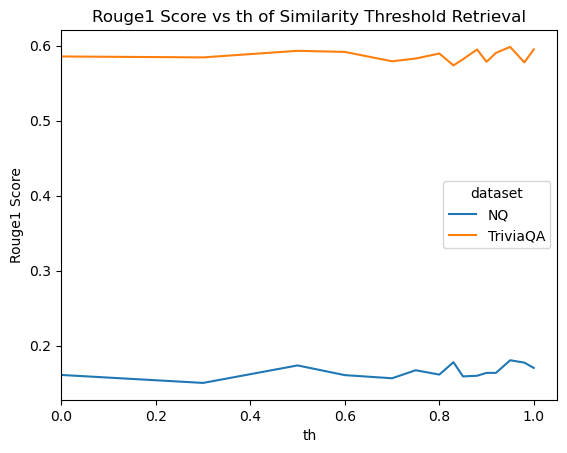

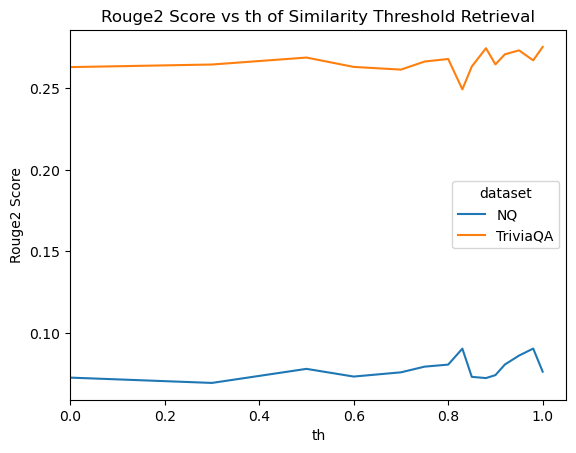

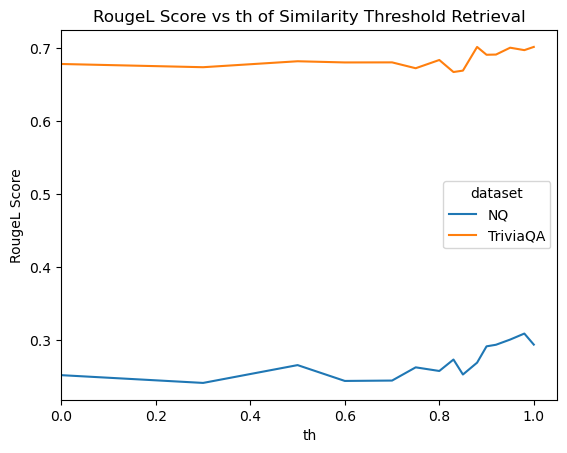

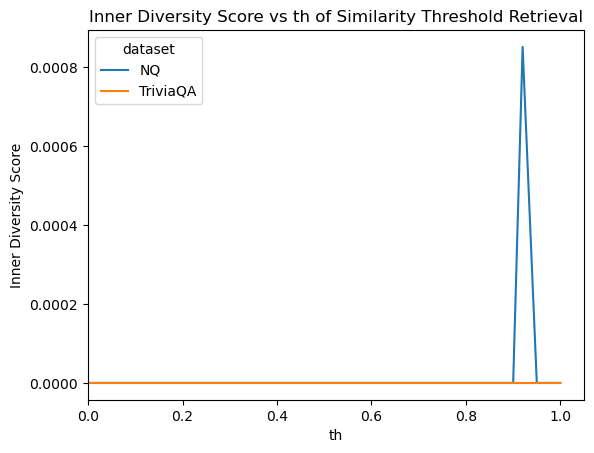

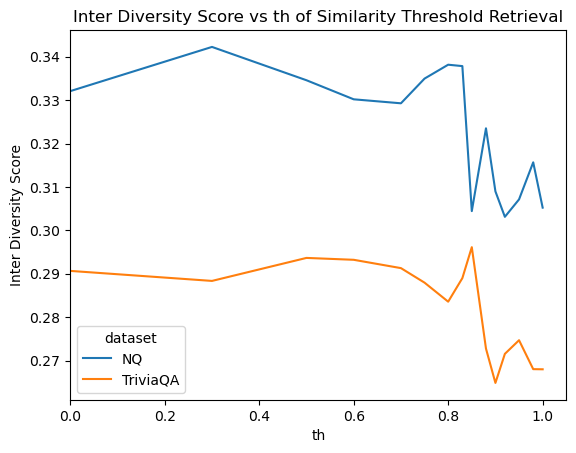

In [14]:
for project in ["threshold"]:
    term = vary_terms[project]
    name = project_names[project]
    for metric in metrics:
        score_data = pd.DataFrame(scores[project][metric])
        sns.lineplot(x=f'{term}', y=f'{metric} Score', data=score_data, hue="dataset")
        plt.xlim(0,)
        plt.title(f'{metric} Score vs {term} of Similarity Threshold Retrieval')
        plt.savefig(f'wmd/{project}_{metric}.png')
        plt.show()
        

In [8]:
for ds in datasets:
    print(ds)
    print(score_data[score_data["dataset"]==ds]["Inter Diversity Score"].values)
    print('\n')

NQ
[0.3320711  0.34225038 0.33457446 0.33018455 0.32926481 0.33495844
 0.33815416 0.33783354 0.3044376  0.3235012  0.30897583 0.30311807
 0.30713153 0.31566806 0.30523284]


TriviaQA
[0.29066405 0.28835741 0.29365464 0.29322106 0.29130353 0.28795233
 0.28357562 0.28899517 0.29613041 0.27277295 0.26486287 0.27155627
 0.27469451 0.26803584 0.26800143]




In [9]:
score_data = pd.DataFrame(scores["threshold"]["Inter Diversity"])

for ds in datasets:
    print("WMD diversity of "+ds)
    print(score_data[score_data["dataset"]==ds])
    print('\n')

WMD diversity of NQ
      th  Inter Diversity Score dataset
0   0.00               0.332071      NQ
1   0.30               0.342250      NQ
2   0.50               0.334574      NQ
3   0.60               0.330185      NQ
4   0.70               0.329265      NQ
5   0.75               0.334958      NQ
6   0.80               0.338154      NQ
7   0.83               0.337834      NQ
8   0.85               0.304438      NQ
9   0.88               0.323501      NQ
10  0.90               0.308976      NQ
11  0.92               0.303118      NQ
12  0.95               0.307132      NQ
13  0.98               0.315668      NQ
14  1.00               0.305233      NQ


WMD diversity of TriviaQA
      th  Inter Diversity Score   dataset
15  0.00               0.290664  TriviaQA
16  0.30               0.288357  TriviaQA
17  0.50               0.293655  TriviaQA
18  0.60               0.293221  TriviaQA
19  0.70               0.291304  TriviaQA
20  0.75               0.287952  TriviaQA
21  0.80          

In [10]:

score_data = pd.DataFrame(scores["threshold"]["RougeL"])

for ds in datasets:
    print(ds)
    print(score_data[score_data["dataset"]==ds]["RougeL Score"].values)
    print('\n')

NQ
[0.25259507 0.24199243 0.26634564 0.24470177 0.24521407 0.2632886
 0.2583201  0.27395541 0.25349028 0.26970286 0.29199868 0.29416919
 0.30125432 0.30946901 0.29436975]


TriviaQA
[0.6779364  0.67353314 0.68167144 0.68004753 0.68014075 0.67212677
 0.68340118 0.66694655 0.66888128 0.70123255 0.69053946 0.69083226
 0.70019811 0.69687566 0.70126444]




In [11]:
score_data = pd.DataFrame(scores["threshold"]["RougeL"])

for ds in datasets:
    print("RougeL of "+ds)
    print(score_data[score_data["dataset"]==ds])
    print('\n')

RougeL of NQ
      th  RougeL Score dataset
0   0.00      0.252595      NQ
1   0.30      0.241992      NQ
2   0.50      0.266346      NQ
3   0.60      0.244702      NQ
4   0.70      0.245214      NQ
5   0.75      0.263289      NQ
6   0.80      0.258320      NQ
7   0.83      0.273955      NQ
8   0.85      0.253490      NQ
9   0.88      0.269703      NQ
10  0.90      0.291999      NQ
11  0.92      0.294169      NQ
12  0.95      0.301254      NQ
13  0.98      0.309469      NQ
14  1.00      0.294370      NQ


RougeL of TriviaQA
      th  RougeL Score   dataset
15  0.00      0.677936  TriviaQA
16  0.30      0.673533  TriviaQA
17  0.50      0.681671  TriviaQA
18  0.60      0.680048  TriviaQA
19  0.70      0.680141  TriviaQA
20  0.75      0.672127  TriviaQA
21  0.80      0.683401  TriviaQA
22  0.83      0.666947  TriviaQA
23  0.85      0.668881  TriviaQA
24  0.88      0.701233  TriviaQA
25  0.90      0.690539  TriviaQA
26  0.92      0.690832  TriviaQA
27  0.95      0.700198  TriviaQA
28  0.98

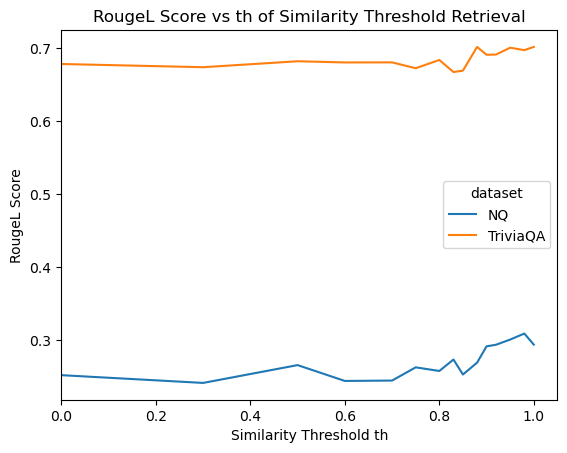

In [20]:
for project in ["threshold"]:
    term = vary_terms[project]
    name = project_names[project]
    for metric in ["RougeL"]:
        score_data = pd.DataFrame(scores[project][metric])
        sns.lineplot(x=f'{term}', y=f'{metric} Score', data=score_data, hue="dataset")
        plt.xlim(0,)
        plt.xlabel("Similarity Threshold th")
        plt.ylabel("RougeL Score")
        plt.title(f'RougeL Score vs {term} of Similarity Threshold Retrieval')
        plt.savefig(f'wmd/{project}_{metric}.png')
        plt.show()